In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/ex2data1.txt", names=['score1', 'score2', 'result'])

In [3]:
data.head()

,score1,score2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


#### Visualizing the data

In [4]:
pos= data[data['result']==1]
neg=data[data['result']==0]

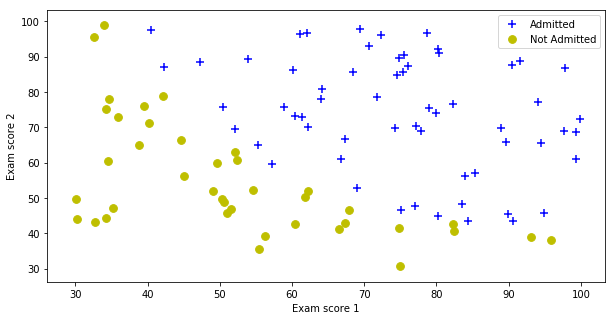

In [5]:
plt.figure(figsize=[10,5])
plt.scatter(pos.score1, pos.score2, marker='+',c='b', s=60, label='Admitted') # c=color, s=size
plt.scatter(neg.score1, neg.score2, marker='o',c='y',s=60, label='Not Admitted')
plt.legend()
plt.xlabel('Exam score 1')
plt.ylabel('Exam score 2')
plt.show()

In [7]:
xdata= pd.DataFrame()
inter= np.ones(len(data.result))
xdata['i']=inter
xdata[['score1', 'score2']]= data[['score1', 'score2']]

In [8]:
x= np.asarray(xdata)
y= np.asarray(data['result'])

#### Logistic regression hypothesis: Sigmoid function

In [9]:
def sigmoid(z):
    return (1/(1+ np.exp(-z)))

#### Cost Function

In [43]:
def cost(theta,x,y):
    
    m= len(y)
    h= sigmoid(x.dot(theta)) # 100 by 3 , 3 by 1 = 100 by 1
    cost= (-(y.T.dot(np.log(h))) - (1-y).T.dot(np.log(1-h)))*(1/m) # 1 by 100, 100 by 1 = 1 by 1 
    

    return cost

In [45]:
theta = np.array([0,0,0])
cost(theta,x,y)

0.6931471805599452

#### Gradient Descent

In [57]:
def gradient(theta,x,y):
   
    m=len(y)
    h= sigmoid(x.dot(theta.T)) # 100 by 3 , 3 by 1 = 100 by 1  
    grad= x.T.dot(h-y)*(1/m) # 3 by 100, 100 by 1 = 3 by 1
    
    return grad.flatten()

In [58]:
gradient(theta,x,y)

array([ -0.1       , -12.00921659, -11.26284221])

#### Minimze function to find the best parameter for Logistic Regression cost function

In [59]:
from scipy.optimize import minimize

In [60]:
param = minimize(cost, theta, args=(x,y), jac=gradient, options={'maxiter':400})
param

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


      fun: 0.2034977015894438
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476820e-09, -9.31921318e-07, -2.82608928e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [72]:
def predict(theta, x):
    pred= sigmoid(x.dot(theta.T)) # 1 by 3 , 3 by 1= 1 by 1
    return pred

In [73]:
a=np.array([1,45,85])

In [139]:
predict(param.x,a) #sigmoid(-25 + (45*0.206) + (85 * 0.2014))

0.7762907240588947

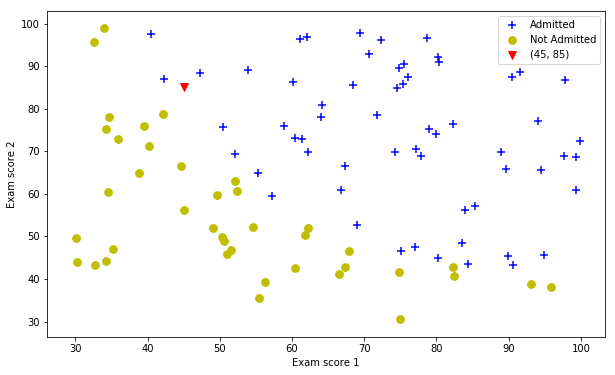

In [140]:
plt.figure(figsize=[10,6])

plt.scatter(pos.score1, pos.score2, marker='+',c='b', s=60, label='Admitted') # c=color, s=size
plt.scatter(neg.score1, neg.score2, marker='o',c='y',s=60, label='Not Admitted')
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plt.xlabel('Exam score 1')
plt.ylabel('Exam score 2')
plt.legend()
plt.show()

### Regularized logistic regression

In [266]:
data2= pd.read_csv("C://Users/Saba Naseem/Desktop/Machine Learning/Datasets/ex2data2.txt", names=['test1', 'test2', 'result'])

In [267]:
data2.head()

,test1,test2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


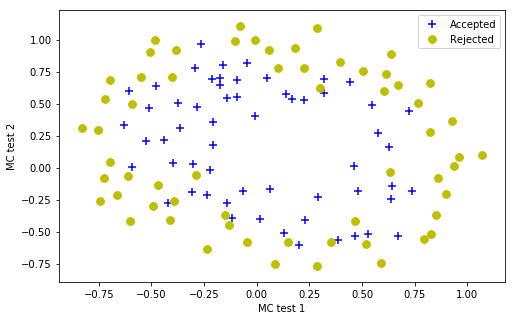

In [268]:
pos2= data2[data2['result']==1]
neg2=data2[data2['result']==0]
plt.figure(figsize=[8,5])
plt.scatter(pos2.test1, pos2.test2, marker='+',c='b', s=60, label='Accepted') # c=color, s=size
plt.scatter(neg2.test1, neg2.test2, marker='o',c='y',s=60, label='Rejected')
plt.legend()
plt.xlabel('MC test 1')
plt.ylabel('MC test 2')
plt.show()

In [269]:
from sklearn.preprocessing import PolynomialFeatures

In [310]:
polynomial= PolynomialFeatures(6)
x2= polynomial.fit_transform(data2[['test1', 'test2']])

In [311]:
x2.shape

(118, 28)

In [312]:
y2=np.asarray(data2[['result']])

In [313]:
x2[:1]

array([[1.00e+00, 5.13e-02, 7.00e-01, 2.63e-03, 3.59e-02, 4.89e-01,
        1.35e-04, 1.84e-03, 2.51e-02, 3.42e-01, 6.91e-06, 9.43e-05,
        1.29e-03, 1.76e-02, 2.39e-01, 3.54e-07, 4.83e-06, 6.59e-05,
        9.00e-04, 1.23e-02, 1.68e-01, 1.82e-08, 2.48e-07, 3.38e-06,
        4.61e-05, 6.29e-04, 8.59e-03, 1.17e-01]])

#### Regularized Cost Function

In [314]:
def cost_func(theta, reg, x, y):
    m=len(y)
    h=sigmoid(x.dot(theta))
    cost= ((-(y.T.dot(np.log(h))) - (1-y).T.dot(np.log(1-h)))*(1/m)) + ((np.sum(theta[1:]**2))*(reg/(2*m)))
    return cost[0]

In [315]:
theta2= np.zeros(x2.shape[1]) # 1 for column size

In [316]:
cost_func(theta2, 1, x2,y2 )

0.6931471805599453

#### Regularized Gradient Descent

In [317]:
def grad_desc(theta,reg,x,y):
   
    m=len(y)
    h= sigmoid(x.dot(theta.reshape(-1,1)))
    grad= (x.T.dot(h-y)*(1/m)) +(reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    
    return grad.flatten()

In [319]:
grad=grad_desc(theta2,1,x2,y2)

#### Minimize function to find best parameters

In [320]:
param2 = minimize(cost_func, theta2, args=(1, x2, y2), method=None, jac=grad_desc, options={'maxiter':3000})
param2.x

array([ 1.27,  0.63,  1.18, -2.02, -0.92, -1.43,  0.12, -0.37, -0.36,
       -0.17, -1.46, -0.05, -0.62, -0.27, -1.19, -0.24, -0.21, -0.04,
       -0.28, -0.3 , -0.46, -1.04,  0.03, -0.29,  0.02, -0.33, -0.14,
       -0.92])

### Logistic Regression using Scikit learn

In [321]:
from sklearn.model_selection import train_test_split

##### Split dataset into train and test set:

In [322]:
xtrain, xtest, ytrain, ytest= train_test_split(x2, y2, test_size=0.2, random_state=4)

###### C: Inverse of regularization strength. 
default: 1.0
###### Solver: Algorithm to use in the optimization problem. 
Options: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’} default: ‘liblinear'


In [323]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(C=1, solver='liblinear').fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [324]:
LR.intercept_

array([0.51])

In [325]:
yhat= LR.predict(xtest)

In [326]:
yhat[:4]

array([0, 1, 0, 1], dtype=int64)

In [327]:
yhat_prob=LR.predict_proba(xtest)

In [328]:
yhat_prob[:4]

array([[0.58, 0.42],
       [0.32, 0.68],
       [0.55, 0.45],
       [0.24, 0.76]])

### Evaluation
#### Jaccard Method

In [329]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(ytest, yhat)

0.6666666666666666

#### Confusion Matrix

In [330]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(ytest, yhat, labels=[1,0]))

[[9 4]
 [4 7]]


Confusion matrix, without normalization
[[9 4]
 [4 7]]


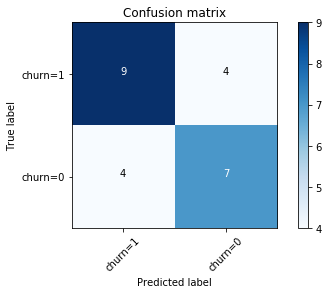

In [331]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')